 ### Implementation of Fuzzy Controller for Train Braking System

In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Input Descriptors
dist = [[0, 40, 80, 120], ["Very Close", "Close", "Far", "Very Far"]]
speed = [[0, 40, 80, 120], ["Very Slow", "Slow", "Fast", "Very Fast"]]

# Output Descriptors
brake = [[0, 20, 40, 60], ["Very Light", "Light", "Heavy", "Very Heavy"]]

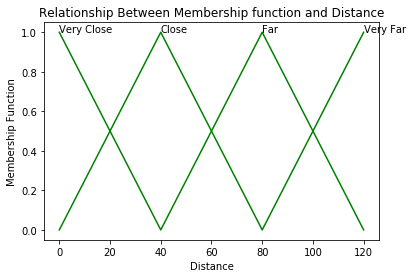

In [3]:
# Graph for Distance Input
fig, ax = plt.subplots()
for i, txt in enumerate(dist[1]):
    ax.annotate(txt, (dist[0][i], 1))
plt.title("Relationship Between Membership function and Distance")
plt.xlabel("Distance")
plt.ylabel("Membership Function")
plt.plot(dist[0], [1, 0, 1, 0], color="g")
plt.plot(dist[0], [0, 1, 0, 1], color="g")
plt.show()

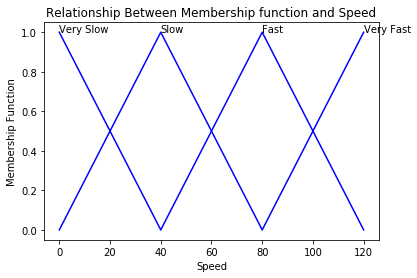

In [4]:
# Graph for Speed Input
fig, ax = plt.subplots()
for i, txt in enumerate(speed[1]):
    ax.annotate(txt, (speed[0][i], 1))
plt.title("Relationship Between Membership function and Speed")
plt.xlabel("Speed")
plt.ylabel("Membership Function")
plt.plot(speed[0], [1, 0, 1, 0], color="b")
plt.plot(speed[0], [0, 1, 0, 1], color="b")
plt.show()

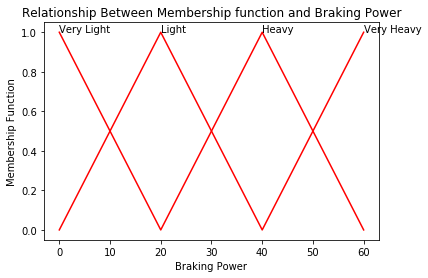

In [5]:
# Graph for Brake Output
fig, ax = plt.subplots()
for i, txt in enumerate(brake[1]):
    ax.annotate(txt, (brake[0][i], 1))
plt.title("Relationship Between Membership function and Braking Power")
plt.xlabel("Braking Power")
plt.ylabel("Membership Function")
plt.plot(brake[0], [1, 0, 1, 0], color="r")
plt.plot(brake[0], [0, 1, 0, 1], color="r")
plt.show()

In [6]:
relation = [
    [brake[1][0], brake[1][1], brake[1][1], brake[1][0]],
    [brake[1][1], brake[1][2], brake[1][1], brake[1][1]],
    [brake[1][2], brake[1][3], brake[1][2], brake[1][2]],
    [brake[1][3], brake[1][3], brake[1][3], brake[1][3]],
]
df = pd.DataFrame(relation)
df.columns = dist[1]
df.index = speed[1]
print(
    f"""
                 Fuzzy Relation
                  ➡ Distance
               ⬇
             Speed"""
)
df


                 Fuzzy Relation
                  ➡ Distance
               ⬇
             Speed


,Very Close,Close,Far,Very Far
Very Slow,Very Light,Light,Light,Very Light
Slow,Light,Heavy,Light,Light
Fast,Heavy,Very Heavy,Heavy,Heavy
Very Fast,Very Heavy,Very Heavy,Very Heavy,Very Heavy


In [7]:
input_dist = int(input("Enter Distance (m): "))
input_speed = int(input("Enter Speed (kmph): "))

Enter Distance (m): 100
Enter Speed (kmph): 25


In [8]:
output_brake = 0
u_brake = (
    (20 - output_brake) / 20,
    (output_brake - 0) / 20,
    (40 - output_brake) / 20,
    (output_brake - 20) / 20,
    (60 - output_brake) / 20,
    (output_brake - 40) / 20,
)

In [9]:
if input_dist >= 0 and input_dist < 40:
    out_dist = [[(40 - input_dist) / 40, (input_dist - 0) / 40], dist[1][0:2]]
elif input_dist >= 40 and input_dist < 80:
    out_dist = [[(80 - input_dist) / 40, (input_dist - 40) / 40], dist[1][1:3]]
elif input_dist >= 80 and input_dist < 120:
    out_dist = [[(120 - input_dist) / 40, (input_dist - 80) / 40], dist[1][2:4]]
else:
    print("Invalid Distance!")
    sys.exit(1)

if input_speed >= 0 and input_speed < 40:
    out_speed = [[(40 - input_speed) / 40, (input_speed - 0) / 40], speed[1][0:2]]
elif input_speed >= 40 and input_speed < 80:
    out_speed = [[(80 - input_speed) / 40, (input_speed - 40) / 40], speed[1][1:3]]
elif input_speed >= 80 and input_speed < 120:
    out_speed = [[(120 - input_speed) / 40, (input_speed - 80) / 40], speed[1][2:4]]
else:
    print("Invalid Speed!")
    sys.exit(1)

In [10]:
output_brake = []
for i in range(len(out_speed[0])):
    for j in range(len(out_dist[0])):
        output_brake.append((min(out_speed[0][i], out_dist[0][j]), out_speed[1][i], out_dist[1][j]))
output_brake = max(output_brake, key=lambda a: a[0])
output_brake

(0.5, 'Slow', 'Far')

In [11]:
a = speed[1].index(output_brake[1])
b = dist[1].index(output_brake[2])
output_brake = (output_brake[0], relation[a][b])
output_brake

(0.5, 'Light')

In [12]:
if output_brake[1] == brake[1][0]:
    res = 20 - (output_brake[0] * 20)
elif output_brake[1] == brake[1][1]:
    res = ((output_brake[0] * 20) + (40 - (output_brake[0] * 20))) / 2
elif output_brake[1] == brake[1][2]:
    res = ((20 + (output_brake[0] * 20)) + (60 - (output_brake[0] * 20))) / 2
elif output_brake[1] == brake[1][3]:
    res = 40 + (output_brake[0] * 20)
else:
    print("Invalid Output!")
    sys.exit(1)
print(f"Brake applied: {res} ({output_brake[1]})")

Brake applied: 20.0 (Light)
